# Description

TODO

# Modules

In [1]:
from pathlib import Path

# import statsmodels.api as sm
import numpy as np
from scipy.stats import uniform
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt

import conf

# from gls import GLSPhenoplier

# Settings

In [2]:
INPUT_DIR = conf.RESULTS["GLS"]
display(INPUT_DIR)

PosixPath('/opt/data/results/gls')

In [3]:
INPUT_FILENAME = INPUT_DIR / "gls-null_simulations.pkl"
display(INPUT_FILENAME)
assert INPUT_FILENAME.exists()

PosixPath('/opt/data/results/gls/gls-null_simulations.pkl')

# Load data

## Null simulations

In [4]:
results = pd.read_pickle(INPUT_FILENAME)

In [5]:
results.shape

(30, 6)

In [6]:
results.head()

,phenotype,lv,coef,pvalue,pvalue_twosided,summary
0,random_normal-0,LV1,0.010088,0.208194,0.416388,GLS Regression Res...
1,random_normal-0,LV2,0.003398,0.392886,0.785772,GLS Regression Res...
2,random_normal-0,LV3,0.008308,0.256323,0.512647,GLS Regression Res...
3,random_normal-1,LV1,0.013093,0.144843,0.289685,GLS Regression Res...
4,random_normal-1,LV2,0.004008,0.373797,0.747594,GLS Regression Res...


# Plots

In [7]:
# data = -np.log10(results["pvalue"].to_numpy())
data = results["pvalue"].to_numpy()
# uniform_data = -np.log10(uniform.rvs(size=data.shape[0]))
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [8]:
uniform_data

array([0.03978535, 0.07139005, 0.10299474, 0.13459943, 0.16620413,
       0.19780882, 0.22941351, 0.26101821, 0.2926229 , 0.32422759,
       0.35583229, 0.38743698, 0.41904168, 0.45064637, 0.48225106,
       0.51385576, 0.54546045, 0.57706514, 0.60866984, 0.64027453,
       0.67187923, 0.70348392, 0.73508861, 0.76669331, 0.798298  ,
       0.82990269, 0.86150739, 0.89311208, 0.92471677, 0.95632147])

Text(0.5, 1.0, 'QQ-Plot')

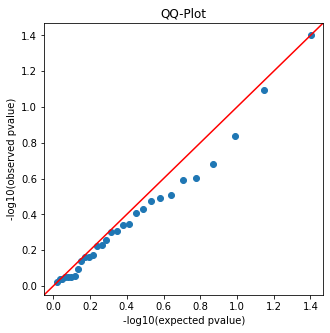

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

ax.set_xlabel("-log10(expected pvalue)")
ax.set_ylabel("-log10(observed pvalue)")
ax.set_title("QQ-Plot")